
### Titanic Plotting
- Load data generated previously from 'titanic_filtered.csv'
- plot histogram of ages of people
- plot no of people in each pclass on bar chart


- plot a horizontal bar-chart depicting the ratio of males to females
- plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead. 
- plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
- plot stacked bar of survived with different pclass in same bar.


- plot box plot of ages of survived vs not-survived
- plot scatter plot of ages vs survived.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic_filtered.csv')

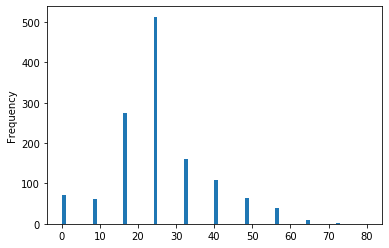

In [3]:
# plot histogram of ages of people
df.age.plot(kind="hist",width=1)


In [7]:
print(dir(axes))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alpha', '_anchor', '_animated', '_aspect', '_autoscaleXon', '_autoscaleYon', '_autotitlepos', '_axes', '_axes_locator', '_axisbelow', '_clipon', '_clippath', '_connected', '_contains', '_convert_dx', '_current_image', '_facecolor', '_frameon', '_gci', '_gen_axes_patch', '_gen_axes_spines', '_get_axis_list', '_get_clipping_extent_bbox', '_get_lines', '_get_patches_for_fill', '_get_view', '_gid', '_gridOn', '_in_layout', '_init_axis', '_label', '_layoutbox', '_left_title', '_make_twin_axes', '_mouseover', '_mouseover_set', '_navigate', '_navigate_mode', '_oid', '_on_units_c

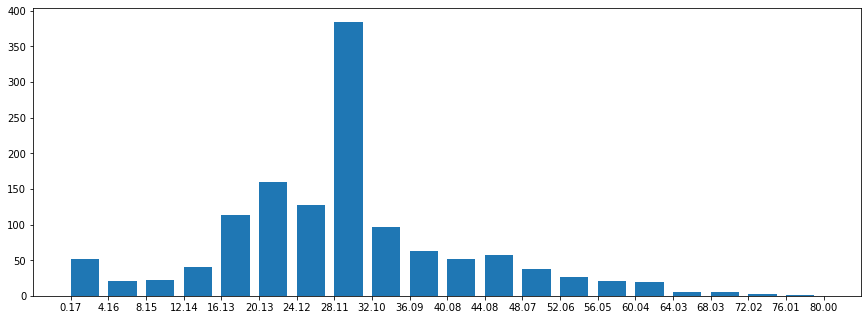

In [12]:
fig = plt.figure(figsize=(11.5,4))
axes = fig.add_axes([0,0,1,1])
r = axes.hist(df.age, bins = 20, width=3)
axes.set_xticks(r[1])
plt.show()

[321 277 709]
Int64Index([1, 2, 3], dtype='int64', name='pclass')


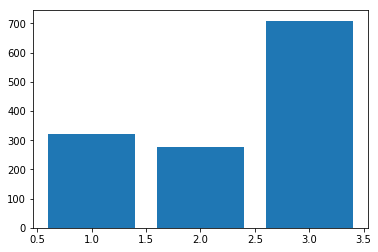

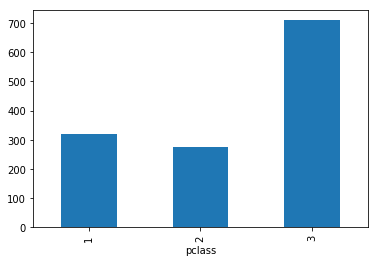

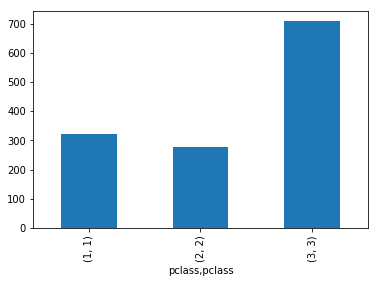

In [25]:
plt.bar(x.index,x.values,label='pclass_of_people')
plt.xlabel('pclass')
plt.ylabel('noofpeople')
plt.show()

In [14]:
print(df.columns)

Index(['Unnamed: 0', 'pclass', 'survived', 'gender', 'age', 'sibsp', 'parch',
       'fare', 'embarked'],
      dtype='object')


male      843
female    464
Name: gender, dtype: int64
0 843
1 464


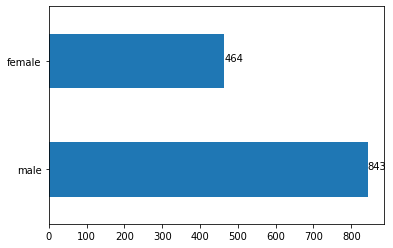

In [24]:
# plot a bar-chart depicting the ratio of males to females

df.gender.value_counts().plot(kind='barh')
r = df.gender.value_counts()
print(r)

for i,v in enumerate(r.values):
    print(i,v)
    plt.text(v, i, str(v))

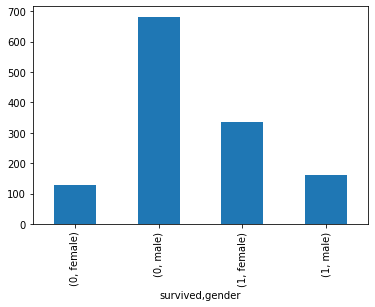

In [25]:
# plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.
groups = df.groupby(['survived','gender']).size()
groups.plot.bar()
#groups.plot(kind='bar')


survived  gender
0         female    127
          male      682
1         female    337
          male      161
dtype: int64

gender    female  male
survived              
0            127   682
1            337   161


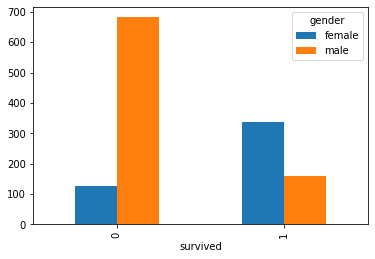

In [31]:
grp = df.groupby(['survived','gender'])
r =  grp.size()
print(r)

v = r.unstack() # pivot
print()
print(v)
v.plot(kind='bar')

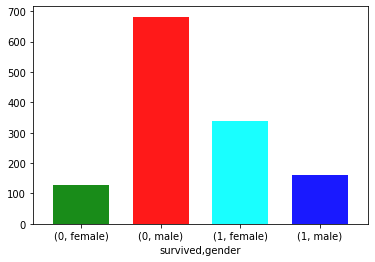

In [37]:
groups = df.groupby(['survived','gender']).size()
groups.plot.bar(width=0.7,color=["green","red","cyan","blue"],alpha=0.9,rot=0)


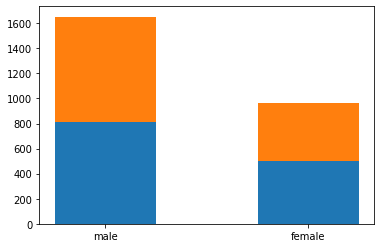

In [38]:
titanic = df
groups = titanic.groupby(['survived']).gender.size()
plt.bar(titanic.survived.value_counts().index, titanic.survived.value_counts(), width=0.5)
plt.bar(titanic.gender.value_counts().index, titanic.gender.value_counts(), bottom=titanic.survived.value_counts(), width=0.5)
plt.xticks(titanic.survived.value_counts().index, rotation=0)
plt.show()


survived
0    809
1    498
Name: gender, dtype: int64

survived  gender
0         male      682
          female    127
1         female    337
          male      161
Name: gender, dtype: int64

gender  survived
female  0           127
        1           337
male    0           682
        1           161
dtype: int64

survived    0    1
gender            
female    127  337
male      682  161


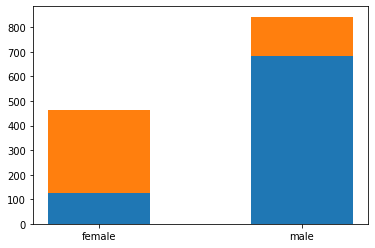

In [51]:
r = titanic.groupby(['survived']).gender.size()
print(r)
print()
r = titanic.groupby(['survived']).gender.value_counts()
print(r)

print()
r = df.groupby(['gender', 'survived']).size() #
print(r)

print()
r = r.unstack()
print(r)

plt.bar(r.index, r[0], width=0.5)
plt.bar(r.index, r[1], bottom=r[0], width=0.5)
plt.show()

In [ ]:
titanic.groupby(by=['gender','survived'])['gender'].count().unstack('survived').plot(kind='bar',stacked=True)


In [56]:
grp = df.groupby(['gender', 'survived'])
print(dir(grp))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_add_numeric_operations', '_agg_examples_doc', '_agg_see_also_doc', '_aggregate', '_aggregate_generic', '_aggregate_item_by_item', '_aggregate_multiple_funcs', '_apply_filter', '_apply_to_column_groupbys', '_apply_whitelist', '_assure_grouper', '_block_agg_axis', '_bool_agg', '_builtin_table', '_choose_path', '_concat_objects', '_constructor', '_cumcount_array', '_cython_agg_blocks', '_cython_agg_general', '_cython_table', '_cython_transform', '_decide_output_index', '_def_str', '_define_paths', '_deprecations', '_dir_additions', '_dir_deletions', '_fill', '_get_cythonized_result'

In [60]:
# count, min, max, mean .... agg operations
print(df.gender.count())

print()
print(grp.gender.count()) # series

print()
print(grp.count()) # dataframe : non-na

print()
print(grp.size()) # dataframe : no of rows

1307

gender  survived
female  0           127
        1           337
male    0           682
        1           161
Name: gender, dtype: int64

                 Unnamed: 0  pclass  age  sibsp  parch  fare  embarked
gender survived                                                       
female 0                127     127  127    127    127   127       127
       1                337     337  337    337    337   337       337
male   0                682     682  682    682    682   682       682
       1                161     161  161    161    161   161       161

gender  survived
female  0           127
        1           337
male    0           682
        1           161
dtype: int64


In [65]:
# grp.groups is a dict
print(grp.groups)
df.loc[grp.groups[('female',0)]]

{('female', 0): Int64Index([   2,    4,  105,  168,  284,  363,  367,  379,  380,  409,
            ...
            1225, 1228, 1229, 1263, 1265, 1271, 1274, 1277, 1302, 1303],
           dtype='int64', length=127), ('female', 1): Int64Index([   0,    6,    8,   11,   12,   13,   17,   18,   21,   23,
            ...
            1221, 1242, 1245, 1255, 1256, 1258, 1259, 1284, 1288, 1298],
           dtype='int64', length=337), ('male', 0): Int64Index([   3,    7,    9,   10,   15,   16,   19,   25,   30,   34,
            ...
            1294, 1295, 1296, 1297, 1299, 1300, 1301, 1304, 1305, 1306],
           dtype='int64', length=682), ('male', 1): Int64Index([   1,    5,   14,   20,   22,   26,   29,   31,   37,   47,
            ...
            1194, 1226, 1230, 1231, 1234, 1236, 1238, 1252, 1254, 1275],
           dtype='int64', length=161)}


,Unnamed: 0,pclass,survived,gender,age,sibsp,parch,fare,embarked
2,2,1,0,female,2.000000,1,2,151.55,S
4,4,1,0,female,25.000000,1,2,151.55,S
105,105,1,0,female,36.000000,0,0,31.68,C
168,169,1,0,female,50.000000,0,0,28.71,C
284,286,1,0,female,63.000000,1,0,221.78,S
...,...,...,...,...,...,...,...,...,...
1271,1273,3,0,female,18.000000,2,0,18.00,S
1274,1276,3,0,female,31.000000,1,0,18.00,S
1277,1279,3,0,female,14.000000,0,0,7.85,S
1302,1304,3,0,female,14.500000,1,0,14.45,C


In [67]:
for v in grp.groups:
    print(v)

('female', 0)
('female', 1)
('male', 0)
('male', 1)


In [69]:
for k,v in grp.groups.items():
    print(k, v)

('female', 0) Int64Index([   2,    4,  105,  168,  284,  363,  367,  379,  380,  409,
            ...
            1225, 1228, 1229, 1263, 1265, 1271, 1274, 1277, 1302, 1303],
           dtype='int64', length=127)
('female', 1) Int64Index([   0,    6,    8,   11,   12,   13,   17,   18,   21,   23,
            ...
            1221, 1242, 1245, 1255, 1256, 1258, 1259, 1284, 1288, 1298],
           dtype='int64', length=337)
('male', 0) Int64Index([   3,    7,    9,   10,   15,   16,   19,   25,   30,   34,
            ...
            1294, 1295, 1296, 1297, 1299, 1300, 1301, 1304, 1305, 1306],
           dtype='int64', length=682)
('male', 1) Int64Index([   1,    5,   14,   20,   22,   26,   29,   31,   37,   47,
            ...
            1194, 1226, 1230, 1231, 1234, 1236, 1238, 1252, 1254, 1275],
           dtype='int64', length=161)


In [66]:
grp.get_group(('female',0))

,Unnamed: 0,pclass,survived,gender,age,sibsp,parch,fare,embarked
2,2,1,0,female,2.000000,1,2,151.55,S
4,4,1,0,female,25.000000,1,2,151.55,S
105,105,1,0,female,36.000000,0,0,31.68,C
168,169,1,0,female,50.000000,0,0,28.71,C
284,286,1,0,female,63.000000,1,0,221.78,S
...,...,...,...,...,...,...,...,...,...
1271,1273,3,0,female,18.000000,2,0,18.00,S
1274,1276,3,0,female,31.000000,1,0,18.00,S
1277,1279,3,0,female,14.000000,0,0,7.85,S
1302,1304,3,0,female,14.500000,1,0,14.45,C


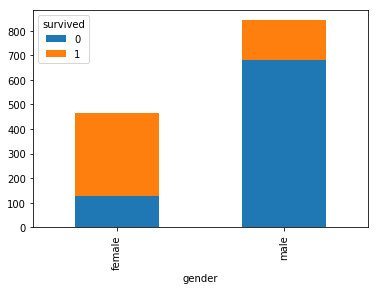

male      682
female    127
Name: gender, dtype: int64


<BarContainer object of 2 artists>

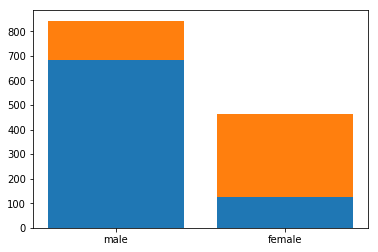

In [90]:
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
titanic = df
groups = titanic.groupby(['survived']).gender.size()
plt.bar(titanic.survived.value_counts().index, titanic.survived.value_counts(), width=0.5)
plt.bar(titanic.gender.value_counts().index, titanic.gender.value_counts(), bottom=titanic.survived.value_counts(), width=0.5)
plt.xticks(titanic.survived.value_counts().index, rotation=0)
plt.show()


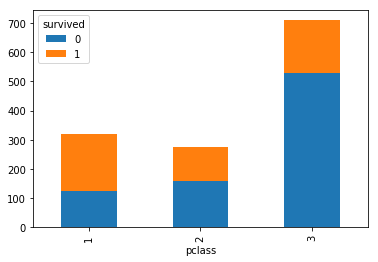

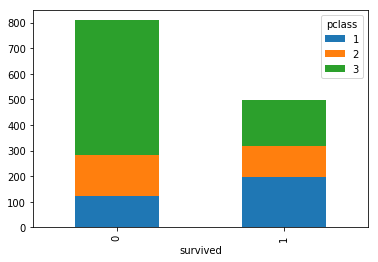

In [95]:
# plot stacked bar of survived with different pclass in same bar
grp = df.groupby([''])

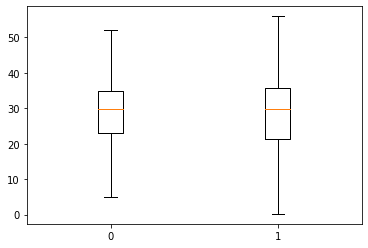

In [75]:
# plot box plot of ages of survived vs not-survived
filtered_data = df
grp = filtered_data.groupby (["survived"])
# grp
plt.boxplot ([grp.get_group(0).age, grp.get_group (1).age], labels=[0,1], showfliers=False)
plt.show()

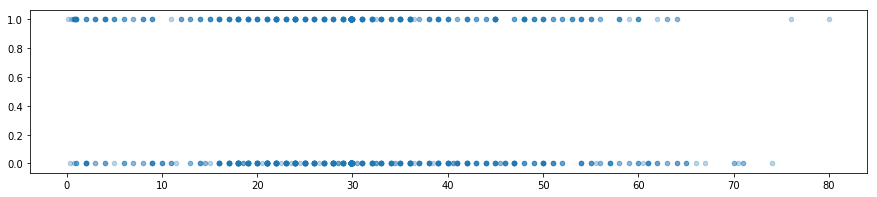

In [134]:
# plot scatter plot of ages vs survived.
